# Lecture 3: Digital Audio Signals
Audio Processing, MED4, Aalborg University, 2019

By Jesper Kjær Nielsen (jkn@create.aau.dk), Audio Analysis Lab, Aalborg University.

Last edited: 2019-02-18

Central aspects of the course
- [x] What is sound?
- [x] How is sound generated?
- [ ] **How is sound turned into signals (i.e., data) on a computer?**
- [ ] How can we analyse these signals (i.e. extract information from them)?
- [ ] How can we modify these signals?
<center>
<img src="figures/apOverview.png" alt="Course overview" width="100%"/>
</center>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling-and-reconstruction" data-toc-modified-id="Sampling-and-reconstruction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling and reconstruction</a></span><ul class="toc-item"><li><span><a href="#Continuous-time-signal" data-toc-modified-id="Continuous-time-signal-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Continuous-time signal</a></span></li><li><span><a href="#Sampling" data-toc-modified-id="Sampling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sampling</a></span></li><li><span><a href="#Discrete-time-signal" data-toc-modified-id="Discrete-time-signal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Discrete-time signal</a></span></li><li><span><a href="#Reconstruction" data-toc-modified-id="Reconstruction-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Reconstruction</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Aliasing" data-toc-modified-id="Aliasing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aliasing</a></span><ul class="toc-item"><li><span><a href="#Discrete-time-sinusoid" data-toc-modified-id="Discrete-time-sinusoid-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Discrete-time sinusoid</a></span></li><li><span><a href="#Aliasing" data-toc-modified-id="Aliasing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Aliasing</a></span></li><li><span><a href="#Nyquist's-sampling-theorem" data-toc-modified-id="Nyquist's-sampling-theorem-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Nyquist's sampling theorem</a></span></li><li><span><a href="#Anti-aliasing-filter" data-toc-modified-id="Anti-aliasing-filter-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Anti-aliasing filter</a></span></li><li><span><a href="#Aliasing-also-occours-in-videos-and-images" data-toc-modified-id="Aliasing-also-occours-in-videos-and-images-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Aliasing also occours in videos and images</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Binary-numbers" data-toc-modified-id="Binary-numbers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Binary numbers</a></span><ul class="toc-item"><li><span><a href="#The-decimal-numer-systems" data-toc-modified-id="The-decimal-numer-systems-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The decimal numer systems</a></span></li><li><span><a href="#The-binary-number-system" data-toc-modified-id="The-binary-number-system-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The binary number system</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-five-minutes-break" data-toc-modified-id="Active-five-minutes-break-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Active five minutes break</a></span></li></ul></li><li><span><a href="#Quantisation" data-toc-modified-id="Quantisation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantisation</a></span><ul class="toc-item"><li><span><a href="#Example:-Storing-$\pi$-on-a-computer" data-toc-modified-id="Example:-Storing-$\pi$-on-a-computer-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example: Storing $\pi$ on a computer</a></span></li><li><span><a href="#The-need-for-quantisation" data-toc-modified-id="The-need-for-quantisation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The need for quantisation</a></span></li><li><span><a href="#Uniform-quantisation" data-toc-modified-id="Uniform-quantisation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Uniform quantisation</a></span></li><li><span><a href="#Quantisation-error" data-toc-modified-id="Quantisation-error-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Quantisation error</a></span></li><li><span><a href="#Dynamic-range" data-toc-modified-id="Dynamic-range-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Dynamic range</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## Sampling and reconstruction
In the next 20 minutes, you will learn
- What a **continuous-time** signal is.
- What a **discrete-time** signal is.
- How you turn a continuous-time signal into a discrete-time signal (i.e., **sampling**).
- How you turn a discrete-time signal into a continuous-time signal (i.e., **reconstruction**).

In the figure below, the following is happening:
1. An audio signal $p_\text{i}(t)$ is propagating through the air as **pressure variations**.
2. The microphone picks up the pressure variations and turns them into **voltage variations** $v_\text{i}(t)$.
3. The voltage is converted into a series of numbers $x_n$ via **sampling**.
4. A voltage signal $v_\text{o}(t)$ is **reconstructed** from the series of numbers $x_n$.
5. A loudspeakers converts the voltage variations into pressure variations $p_\text{o}(t)$.

<center>
<img src="figures/samplingReconstructionIllustration.png" alt="Illustration of sampling and reconstruction" width="80%"/>
</center>

### Continuous-time signal
A **continuous-time** signal is characterised by
- **time**: the signal has a value $x(t)$ for every possible time $t$
- **amplitude**: the signal value $x(t)$ can take on any value from a continuum of numbers (such as the real numbers).

A continuous-time signal is often also referred to as an **analog signal**.

<center>
<img src="figures/continuousTimeSignal.png" alt="Continuous-time signal" width="80%"/>
</center>

Informally: You draw a continuous-time signal without lifting your pen from the paper.

### Sampling
- Storing a continuous-time signal on a computer requires an infinite amount of memory!
- Solution: We only measure the value of a continuous-time signal every $T_\text{s}$ seconds. This is called **sampling**.
- A very important quantity is
$$
    f_\text{s} = 1/T_\text{s}
$$
where
 - $f_\text{s}$ is the **sampling frequency** (measured in Hz) and describes how many times per second the continuous-time signal is sampled
 - $T_\text{s}$ is the **sampling time** (measured in seconds).

<center>
<img src="figures/samplingContinuousTimeSignal.png" alt="Sampling continuous-time signal" width="80%"/>
</center>

We can illustrate sampling by a person controlling a contact (see figure below):
1. When $T_\text{s}$ seconds has passed, the contact is pushed and released immidiately.
2. At that exact time instant, the value of the continuous-time signal $x(T_\text{s})$ is stored on the computer.
3. After another $T_\text{s}$ seconds, the contact is again pushed and released immidiately so that $x(2T_\text{s})$ is now stored.
4. If we keep pushing/relasing the contact every $T_\text{s}$ seconds, we will after $n$ times store the signal value $x(t_n)$ where
$$
    t_n = nT_\text{s} = n/f_\text{s}\ .
$$
The scaler $n$ is often referred to as the **sampling index**.

Note that people often write $x(t_n)$ as
$$
    x(t_n) = x_n = x[n] = x(n)\ .
$$

<center>
<img src="figures/samplingIllustration.png" alt="Illustration of sampling" width="80%"/>
</center>

### Discrete-time signal
A **discrete-time** signal is characterised by
- **time**: the signal only has a value $x_n$ at certain times, i.e., $t_n=nT_\text{s}$ for $n=\cdots,-3,-2,1,0,1,2,3,\cdots$. Therefore, the $x$-axis is often the sampling index $n$ instead of time.
- **amplitude**: the signal value $x_n$ can take on any value from a continuum of numbers (such as the real numbers).

A discrete-time signal is sometimes also referred to as a **digital signal** (although we will use this term for something slightly different later).

<center>
<img src="figures/discreteTimeSignal.png" alt="Discrete-time signal" width="80%"/>
</center>

Informally: A discrete-time signal is a series of time-ordered numbers.

### Reconstruction
If we want to play back a discrete-time signal on, e.g., a loudspeaker, we have to convert the discrete-time signal back into a continuous-time signal.
- Converting a discrete-time signal $x_n$ into a continuous-time signal $x(t)$ is called **reconstruction**.
- Reconstruction is performed using two components:
 - **hold circuit**: holds a value $x_n$ for $T_\text{s}$ seconds. This will create a **staircase** signal.
 - **post filter**: smooth out the discountinuities in the staircase signal by using a low-pass filter with a cut-off frequency of $f_\text{s}/2$ Hz.

<center>
<img src="figures/reconstructionIllustration.png" alt="Illustration of reconstruction" width="80%"/>
</center>

---
Note that we will talk much more about filtering in the next lectures.

### Summary
1. A **continuous-time** signal $x(t)$ can be drawn without lifting the pen from the paper.
2. A **discrete-time** signal $x_n = x(t_n)$ is a series of time-ordered numbers.
3. **Sampling** converts a $x(t)$ into $x_n$ by measuring the value of $x(t)$ at the times
$$
    t_n = nT_\text{s} = n/f_\text{s}
$$
where
 - $n$ is the **sampling index**
 - $T_\text{s}$ is the **sampling time**
 - $f_\text{s}=1/T_\text{s}$ is the **sampling frequency**
4. **Reconstruction** converts $x_n$ into $x(t)$ by first creating a staircase signal from $x_n$ and then by filtering this staircase signal with a low-pass filter.


### Active 5 minutes break
Assume that we have a continuous-time signal given by
$$
    x(t) = \sin(2\pi f t)
$$
where the frequency of the sinusoid is $f=1$ Hz.
1. Sketch the signal from $t=-0.5$ s to $t= 2$ s.

We now sample the signal with a sampling frequency of $f_\text{s}=4$ Hz.
2. What is the sampling time $T_\text{s}$?
3. Sketch the sampled signal $x_n$ (in a new plot with the time index $n$ on the $x$-axis).
4. Sketch the staircase signal $x_\text{sc}(t)$ from $x_n$.
5. Repeat 2. to 4. with a sampling frequency of $f_\text{s}=1$ Hz.


## Aliasing
In the next 20 minutes, you will learn
- How we write a discrete-time sinusoid.
- What aliasing is.
- How we can avoid aliasing by selecting the sampling frequency $f_\text{s}$.
- What an anti-aliasing filter is and why we need it.

### Discrete-time sinusoid
As we have seen in the first two lectures, a continuous-time sinusoid can be written as
$$
    x(t) = A\cos(\Omega t+\psi)
$$
where
- $A\geq 0$ is an amplitude
- $\Omega=2\pi f$ is a frequency measured in rad/s
- $\psi$ is the inial phase.

Let us now sample this signal with a sampling frequency of $f_\text{s}$ Hz. We then get the discrete-time sinusoid
\begin{align}
    x_n &= x(t_n) = x(n/f_\text{s}) = A\cos(\Omega n/f_\text{s}+\psi) = A\cos((2\pi f/f_\text{s}) n+\psi)\\
    &= A\cos(\omega n+\psi)
\end{align}
where
- $\omega = \Omega f_\text{s}= 2\pi f/f_\text{s}$ is the **digital frequency** measured in **radians/sample**.

For a discrete-time signal, $\omega = 2\pi$ corresponds to the sampling frequency, and we will also write this frequency as $\omega_\text{s}$.

### Aliasing
- **Aliasing** comes from the word **alias**.
- It refers to that a sinusoidal component of one frequency is 'disguising' itself as a sinusoidal component with another frequency.

As an example, let us try to sample the three continuous-time sinusoids
\begin{align}
    x(t) &= \cos(2\pi f t)\\
    y(t) &= \cos(2\pi (f_\text{s}-f) t)
\end{align}
using a sampling frequency of $f_\text{s}$ Hz.

For the first sinusoid, we get that
$$
    x_n = \cos(\omega n)\ .
$$

For the second sinusoid, we get that
\begin{align}
    y_n &= \cos((\omega_\text{s}-\omega) n) = \text{Re}\left[\mathrm{e}^{j(\omega_\text{s}-\omega) n}\right] = \text{Re}\left[\mathrm{e}^{j\omega_\text{s} n}\mathrm{e}^{-j\omega n}\right]
\end{align}
However, we have that
$$
    \mathrm{e}^{j\omega_\text{s}n} = \mathrm{e}^{j2\pi n} = \cos(2\pi n)+j\sin(2\pi n) = 1
$$
for all time indices $n$ since $n$ is an integer. This means that
$$
    y_n = \text{Re}\left[\mathrm{e}^{-j\omega n}\right] = \cos(-\omega n) = \cos(\omega n)
$$
which is exactly the same as $x_n$.

**Observation:** Even though the continuous time signals $x(t)$ and $y(t)$ have **different frequencies**, the discrete-time signals $x_n$ and $y_n$ have the **same digital frequency**.

Some consequences:
- Reconstructing a continuous-time signal from $y_n$ results in $x(t)$ - not $y(t)$.
- We say that $y(t)$ has been **aliased** when we cannot recover it again after sampling it.
- A discrete-time sinusoid of digital frequency $\omega=2\pi f/f_\text{s}$, could be a sampled continuous-time sinusoid given by
$$
    y(t) = A\cos((\Omega+k2\pi f_\text{s})t + \psi)
$$
for any integer $k$.

<center>
<img src="figures/aliasingExample.png" alt="Example of aliasing" width="80%"/>
</center>

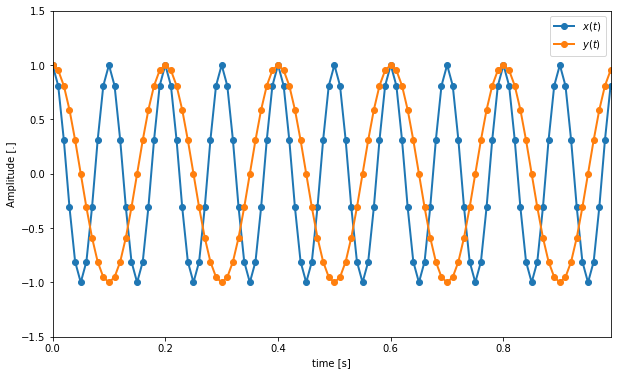

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sinusoid(samplingIndices, digitalFreq):
    '''Compute a cosine'''
    return np.cos(2*np.pi*digitalFreq*samplingIndices)

nData = 100
samplingFreq = 100 # Hz
samplingTime = 1/samplingFreq # s
samplingIndices = np.arange(nData)
time = samplingIndices*samplingTime
freqA = 10 # Hz
freqB = 5 # Hz (samplingFreq-freqA)

# plot the results
plt.figure(figsize=(10,6))
plt.plot(time, sinusoid(samplingIndices,freqA/samplingFreq), linewidth=2, marker='o', label="$x(t)$")
plt.plot(time, sinusoid(samplingIndices,freqB/samplingFreq), linewidth=2, marker='o', label="$y(t)$")
plt.legend()
plt.xlim((time[0],time[nData-1])), plt.ylim((-1.5,1.5))
plt.xlabel('time [s]'), plt.ylabel('Amplitude [.]');

### Nyquist's sampling theorem
To avoid aliasing, the maximum frequency $f_\text{max}$ in a continuous-time signal must satisfy that
$$
    2f_\text{max} < f_\text{s}
$$
where $f_\text{s}$ is the sampling frequency.

We can satisfy the sampling theorem in two ways:
1. Select the sampling frequency $f_\text{s}$ high enough
2. Pre-filter the continuous-time signal with a low-pass filter (a so-called **anti-aliasing filter**) with a cut-off frequency below $f_\text{s}/2$.

#### Typical sampling frequencies used for recording audio
| Application | Sampling frequency $f_\text{s}$ |
|-------------|---------------------------------|
|CD           | 44100 Hz|
|Narrowband speech| 8000 Hz|
|Widebannd speech, VoIP| 16000 Hz|
|Video recorders| 48000 Hz|
|DVD-audio and Blu-ray| 96000 and 192000 Hz|

### Anti-aliasing filter
- Often, we do not know the highest frequency $f_\text{max}$ in our input signal.
- Instead, we simply filter out all frequency content above $f_\text{s}/2$ to avoid aliasing.
- This filter is called an **anti-aliasing filter** and is present in all practical sampling blocks.
<center>
<img src="figures/ap3SamplingAntiAliasing.png" alt="Illustration of filtering and sampling" width="80%"/>
</center>

### Aliasing also occours in videos and images
<br />
<center>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=ttgLyWFINJI
" target="_blank"><img src="http://img.youtube.com/vi/ttgLyWFINJI/0.jpg" 
alt="Taylor series" width="480" height="360" border="10" /></a>
</center>

<center>
<img src="https://svi.nl/wikiimg/StFargeaux_kasteel_buiten1_aliased.jpg" alt="Image example of aliasing" width="80%"/>
</center>

### Summary
1. A discrete-time sinusoid is written as
$$
    x_n = A\cos(\omega n +\psi)
$$
where $A$ and $\psi$ have the same meaning as for the continuous-time sinusoid and
- $\omega = 2\pi f/f_\text{s}$ is the **digital frequency** and measured in rad/sample
- $f_\text{s}$ is the **sampling frequency** measured in Hz.
2. Aliasing refers to when the frequency of a sinusoid is lowered due to undersampling the signal.
3. To avoid aliasing, we must satisfy **Nyquist's sampling theorem** stating that
$$
    2f_\text{max} < f_\text{s}
$$
where $f_\text{max}$ is the maximum frequency in the continuous-time input signal.
4. We can limit the maximum frequency of a continuous-time input signal by passing it through an **anti-aliasing filter**. This filter, which is a low-pass filter, ensures that aliasing does not occur.

## Binary numbers
In the next 20 minutes, you will learn
- What a binary number is
- What a bit and a byte is
- How you store data on, e.g., a computer or a CD
- To get the following slightly geeky joke :)

> There are 10 types of people in this world.
> Those who understand binary numbers and those who don't!

### The decimal numer systems
We are used to the decimal number system where we encounter numbers such 3, 42, and 89809.

Let's look at the example
$$
    1314\ .
$$
We can make the following observations about this decimal number:
- The number consists of four symbols, each called a **digit**
- Each digit can be one of ten possible symbols (either 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9).
- The order of the digits matter. For example, the right-most one in 1314 represents the number of 10s whereas the left-most one represents the number of 1000s. A number system with ordering is called a **positional number system**.

We can rewrite the decimal number 1314 as
\begin{align}
    1314 &= 1000 + 300 + 10 + 4\\
         &= 1\cdot 1000 + 3\cdot 100 + 1\cdot 10 + 4\cdot 1\\
         &= 1\cdot 10^3 + 3\cdot 10^2 + 1\cdot 10^1 + 4\cdot 10^0\ .
\end{align}

In general, we can write an $N$ digit decimal number $d_{N-1}d_{N-2}\cdots d_2d_1d_0$ as
$$
    d_{N-1}d_{N-2}\cdots d_2d_1d_0 = \sum_{n=0}^{N-1}d_n10^n\ .
$$

Note that
- $d_n\in\{0,1,2,3,4,5,6,7,8,9\}$
- 10 is the number of symbols that $d_n$ can take on and is called the **base** of the decimal number system.

Let us now allow for an arbitrary base $b$. Then we can write numbers as
$$
    d_{N-1}d_{N-2}\cdots d_2d_1d_0 = \sum_{n=0}^{N-1} d_n b^n
$$
where
- $d_n\in\{0,1,\ldots,b-1\}$ 
- $b$ is the base of the number.

For different values of $b$, we get different number systems. Some examples are
- $b=10$: The **decimal number system** with possible symbols 0,1,2,3,4,5,6,7,8,9
- $b=2$: The **binary number system** with possible symbols 0,1
- $b=16$: The **hexadecimal number system** with possible symbols 0,1,2,3,4,5,6,7,8,9, A, B, C, D, E, F

### The binary number system
A binary number 
- has base 2 and
- is written only in terms of 0s and 1s.

An example of a binary number is 
$$
    0110\ 1101_2
$$
where the subscript 2 is here only added to make it explicit that $0110\ 1101$ is a binary number.

Note that
- a 'digit' in a binary number is called a **bit**
- a collection of 8 bits is called a **byte** with symbol B
- a computer represents everything (numbers, colours, text, etc.) as binary numbers

Thus, the binary number $0110\ 1101_2$ has 8 bits and 1 byte (or 1 B)

#### Converting binary numbers to decimal numbers
To convert from a binary number to a decimal number, we simple use the expression
$$
    d_{N-1}d_{N-2}\cdots d_2d_1d_0 = \sum_{n=0}^{N-1} d_n b^n\ .
$$

As an example, we get that $1101_2$ converts to
\begin{align}
    1101_2 &= 1\cdot 2^3 + 1\cdot 2^2 + 0\cdot 2^1 + 1\cdot 2^0\\
    &= 1 \cdot 8 + 1 \cdot 4 + 0\cdot 2 + 1\cdot 1\\
    &= 13_{10}\ .
\end{align}

Converting from decimal numbers to binary numbers is also possible, but is not covered here.

#### Adding binary numbers
You do it exactly as you learned in 2nd grade with decimal numbers. That is,
- $0_2+0_2 = 0_2$
- $0_2+1_2 = 1_2$
- $1_2+1_2 = 0_2$ with $1_2$ in carry

Using these three rules, we obtain
$$
\begin{array}[t]{r}
    0100\ 1001_2 \\
+ \ 0111\ 1100_2 \\ \hline
    1100\ 0101_2
\end{array}
$$

#### Example: Representing text using binary numbers
<center>
<img src="figures/ascii.png" alt="ASCII characters" width="100%"/>
</center

#### Example: Storing data on a disc
Information is stored by making tiny indentations known as **pits** on a disc.
- A pit represents a 0
- The opposite of a pit (called land) represents a 1
<center>
<img src="figures/pits.jpg" alt="ASCII characters" width="100%"/>
</center

- The binary data is stored along one long spiral on the disc.
 - **CD**: The spiral is 5.7 km long
 - **DVD**: The spiral is 12.3 km long
 - **Blu-ray**: The spiral is 28.4 km long
- A laser is used for reading the binary data by following this spiral path.

<br />
<center>
<img src="figures/spiral.jpg" alt="ASCII characters" width="40%"/>
</center

### Summary
1. A binary number
 - only contains 0s and 1s
 - consists of bits
2. A collection of eight bit is called a **byte**
3. Everything (numbers, text, images, video, audio, etc.) is stored and manipulated as binary numbers on a computer
4. The following slightly geeky joke is now funny ;)

> There are 10 types of people in this world.
> Those who understand binary numbers and those who don't!

### Active five minutes break
1. Convert the following binary numbers to decimal numbers: $10_2$, $110_2$, and $0101_2$.
2. How many different binary numbers could you write with 4 bits?
3. How many bits can be stored on a 700 GB harddrive?
4. If you have an internet connection with a download speed of 10 Mbit/s, how much time does it then take to download a 100 MB file?

---
Bonusinfo:
1. With base $b=2$, a binary number can be written as
$$
    d_{N-1}d_{N-2}\cdots d_2d_1d_0 = \sum_{n=0}^{N-1} d_n b^n\ .
$$
2. G means billion ($10^9$), M means million ($10^6$), k means thousand ($10^3$), and B means byte (8 bit)


## Quantisation
In the next 20 minutes, you will learn
- What quantisation is and why it is necessary
- How you will typically do it
- What signal-to-noise ratio (SNR) and dynamic range is

### Example: Storing $\pi$ on a computer
How would you store $\pi$ (or other irrational numbers) on a computer?
<br />
<center>
<img src="https://www.shakespearegeek.com/wp-content/uploads/2017/03/enhanced-buzz-25261-1363280735-6.jpg" alt="Digits of pi" width="70%"/>
</center

- It requires an **infinite** amount of memory to store $\pi$ on a computer.
- Therefore, we have to store an approximation to $\pi$ with only a **finite** number of digits. Let us call this approximation $p$.
- The approximation error $e$ can be written as
$$
    e = \pi-p\ .
$$

**Example**: Let $p$ contain only the first two digits of $\pi$ after the comma (i.e., $p=3.14$). Then
$$
    e = \pi-p = \pi-3.14 = 0.001592653589\ldots
$$

We say that we have rounded of (or **quantized**) $\pi$ to its nearest two-digits-after-the-comma representation.

### The need for quantisation
Sampling converts a continuous-time signal into a discrete-time signal. That is, we go from an infinite number of time values to a finite number of time values.

<center>
<img src="figures/ap3SamplingAntiAliasing.png" alt="Illustration of sampling" width="80%"/>
</center>

However, we also have to do something about the signal value $x(t_n)=x_n$ for every sampling time, so that we can store this number on the computer using a finite number of digits. This is called **quantisation**.

<center>
<img src="figures/ap3AdcIllustration.png" alt="Illustration of ADC" width="90%"/>
</center>

### Uniform quantisation
Assume that we sample the signal value $x_n$ and that
- the signal value is in the interval $(-\alpha,\alpha)$
- we have $\beta$ bits available for storing this signal value.
Note that we can represent $2^\beta$ different values with $\beta$ bits.

We now do the following.
1. Divide the interval $(-\alpha,\alpha)$ into $2^\beta$ equally large cells, each of size
$$
    \Delta = \frac{\alpha-(-\alpha)}{2^\beta} = \frac{2\alpha}{2^\beta} = \frac{\alpha}{2^{\beta-1}}\ .
$$
2. Round (or **quantise**) the signal value $x_n$ to the value $y_n$ at the nearest cell boundary, i.e., 
$$
    y_n = Q(x_n) = \Delta \left\lfloor\frac{x_n}{\Delta}\right\rceil = \Delta \left\lfloor\frac{x_n}{\Delta}+\frac{1}{2}\right\rfloor
$$
where $\lfloor\cdot\rceil$ and $\lfloor\cdot\rfloor$ refer to the rounding and flooring operations, respectively.

#### Example: 3 bit quantisation
In the figure below, the continuous-time signal (dashed gray) is first sampled (green) and then quantised (orange) using a three bit quantiser. The horisontal dashed red lines mark the quantisation levels. The final bit stream is
$$
    100\ 110\ 111\ 111\ 111\ 110\ 110\ 100\ 011\ 010\ 001\ 001\ .
$$
<center>
<img src="figures/ap3ThreeBitQuantisation.png" alt="Three bit quantisation" width="70%"/>
</center>

### Quantisation error
The quantisation error $e_n$ is the difference between the signal value $x_n$ and its rounded value $y_n=Q(x_n)$, i.e.,
$$
    e_n = x_n-Q(x_n)\ .
$$

We can rearrange this into
$$
    Q(x_n) = x_n+e_n\ .
$$
That is, we can think of quantisation as **adding an error** to the signal value $x_n$.

<center>
<img src="figures/ap3QuantiserBlock.png" alt="Quantisation block" width="40%"/>
</center>

A measure of quantisation quality is how big the average power of $e_n$ is compared to the average power of $x_n$. The average power of, e.g., $e_n$ is defined as
$$
    P_e = \frac{1}{N}\sum_{n=0}^{N-1} e_n^2\ .
$$

If we define $P_x$ in a similar way, the signal-to-noise ratio (SNR) is defined as
$$
    \text{SNR} = 10\log_{10}\frac{P_x}{P_e}\ ,
$$
and it is measured in decibel (dB).

Now, assume that 
- the signal values $x_n$ take on values in $(-\alpha,\alpha)$ equally often (a uniform distribution)
- the quantisation errors $e_n$ take on values in $(-\Delta/2,\Delta/2)$ equally often (a uniform distribution)

We then get
\begin{align}
    P_x &= \frac{(2\alpha)^2}{12} = \frac{\alpha^2}{3}\\
    P_e &= \frac{\Delta^2}{12} = \frac{1}{12}\left(\frac{\alpha}{2^{\beta-1}}\right)^2\ .
\end{align}
These results can be derived by computing the variance of a uniform distribution.

Finally, we get the SNR
\begin{align}
    \text{SNR} &= 10\log_{10}\frac{P_x}{P_e} = 10\log_{10}\left(\frac{\alpha^2}{3}12\left(\frac{2^{\beta-1}}{\alpha}\right)^2\right)\\
    &= 10\log_{10}\left(2^{2\beta}\right) = \beta 20 \log_{10} 2 \approx 6\beta\ .
\end{align}

Thus, for every additional bit, the SNR is improved by approximately 6 dB.

### Dynamic range
The **dynamic range** is the ratio between the loudest and softest values we can represent using a $\beta$ bit quantiser.
- **Softest value**: $1$
- **Loudest value**: $2^\beta$

The dynamic range of a quantiser is thus
$$
    \text{DR} = 10\log_{10}\left(\left(\frac{2^\beta}{1}\right)^2\right) = 10\log_{10}\left(2^{2\beta}\right) = \beta 20 \log_{10} 2 \approx 6\beta\ .
$$

Thus, we get a dynamic range of 96 dB for a 16 bit quantiser (typical CD quality) and 144 dB for a 24 bit quantiser. Note that the dynamic range of the human ear is approximately 120 dB.

### Summary
1. A quantiser rounds the signal values to a value on a grid.
2. All the points of the grid can be represented using $\beta$ bits which results in $2^\beta$ possible values.
3. Quantisation introduces noise into the digital signal. The signal-to-noise ratio (SNR) describes how powerful the signal is compared to this quantisation noise.
4. The SNR (and dynamic range) depends on the number of bits used as
$$
    \beta20\log_{10} \approx 6\beta\ .
$$